# Análsis de Trayectorias de dinámica molecular
## RMSD y RMSF

Como primer paso vamos a cargar los datos de la trayectoria de la DM, considerando cada una de las fases realizadas.  
Para ello, comenzamos importando el módulo pytraj.

In [1]:
import pytraj as pyt

A continuación, cargamos la estructura inicial de la porteína, que corresponde a la conformación lineal a partir de la cual realizamos la minimización y la dinámica molecular.  
Observa que la función `pyt.load()` recibe los parámetros `filename` y `top` correspondientes al archivo de coordenadas y de topología, respectivamente.

In [2]:
# Cargamos la restructura inicial, es decir, la estructura lineal del péptido
lineal_strc = pyt.load(
    filename = './1L2Y/1-topologia/tc5b.pdb',
    top = './1L2Y/1-topologia/tc5b.psf')

Ahora, si llamamos a la variable *cristal_strc*, veremos que ésta corresponde a un objeto *pytraj.Trajectory* con los siguientes atributos:

In [3]:
lineal_strc

pytraj.Trajectory, 1 frames: 
Size: 0.000007 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

### Visualización de la estructura
Recordemos que podemos utilizar la librería *nglview* para visualizar la estructura de la proteína:

In [12]:
# Importamos nglview
import nglview as nv
import warnings
lineal_strc_view = nv.show_pytraj(lineal_strc)
lineal_strc_view.background = 'black'
lineal_strc_view

NGLWidget(background='black')

## Carga de la trayectoria
Ahora, vamos a proceder a cargar en memoria los archivos de trayectoria `dcd` de todas las fases de la dinámica. Para ello, es necesario primero definir el archivo de topología que utilizaremos.

In [5]:
f_topology = './1L2Y/4-run_dm_2/tc5b_wb.psf'
top_psf = pyt.load_topology(f_topology)
top_psf

<Topology: 18869 atoms, 6209 residues, 6190 mols, non-PBC>

Este archivo de topoligía incluye a todas las molécuals del sistema, sin embargo, por ahora sólo nos interesa analizar la trayectoria de la proteína, por lo que redefiniremos el archivo de topología para que sólo incluya los átomos de la misma )los primeros 20 residuos del sistema).

In [6]:
top_prot_psf = top_psf[':1-20']
top_prot_psf 

<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>

Ahora procederemos a cargar los archivos dcd. Sin embargo, para este análisis cargaremos archivos dcd a los cuales se les ha removido el solvente, con el objetivo de reducir el tamaño de los archivos y poder distribuirlos en línea.  
A continuación mostramos el ejemplo de cómo se generaron estos archivos "reducidos" a partir de los dcd originales.

In [7]:
# Para optimizar el análisis, previamente se han extraido de las trayectorias
# únicamente los átomos correspondientes a la proteína y guardado en la carpeta
# 5_traj_analysis

# Un ejemplo de cómo realizar dicha extracción es el siguiente:
_min = pyt.load(filename = './1L2Y/4-run_dm_2/1_min/tc5b_wb_min.dcd', 
                top = './1L2Y/4-run_dm_2/tc5b_wb.psf')
print(_min)
# Ahora guardamos un nuevo archivo de trayectoria:
pyt.write_traj(filename = './1L2Y/5-traj_analysis/tc5b_PROT_MIN.dcd', 
               traj = _min[':1-20'], 
               overwrite=True)
print(F'Archivo guardado:\n{_min[":1-20"]}')

pytraj.Trajectory, 1 frames: 
Size: 0.000422 (GB)
<Topology: 18869 atoms, 6209 residues, 6190 mols, non-PBC>
           
Archivo guardado:
pytraj.Trajectory, 1 frames: 
Size: 0.000007 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           


#### Archivos dcd
Ahora ubicamos el directorio y nombre de cada uno de los archivos dcd. Esto incluye también al archivo .pdb con la estructura inicial.

In [8]:
# PDB inicial
f_inicial = './1L2Y/2-solvatar_wt/tc5b_wb.pdb'
# Archivos de dinámica
dir_traj = './1L2Y/5-traj_analysis' # Directorio de los archivos
f_min = F'{dir_traj}/tc5b_PROT_MIN.dcd'
f_heat = F'{dir_traj}/tc5b_PROT_SA.dcd'
f_eq = F'{dir_traj}/tc5b_PROT_EQ.dcd'
f_prod = F'{dir_traj}/tc5b_PROT_PROD.dcd'

Ahora cargamos cada uno de los archivos utilizando el objeto de topoligía top_psf. Como ejemplo puedes ver que también es posible usar el parámetro mask para determinar qué átomos deberán ser considerados al cargarse en memoria. Sin embargo, podemos omitirlo en las fases de minimización en adelante, ya que esta selección de los átomso de laproteína ya la hicimos al cargar el archivo de topología.

In [9]:
#Estructura inicial
init_struc = pyt.load(filename = f_inicial, top = top_psf, mask = ':1-20')
print( F'Estructura inicial: {init_struc.n_frames} frames')

# Minimización
min_traj = pyt.load(filename = f_min, top = top_prot_psf)
print( F'Minimización: {min_traj.n_frames} frames')
# Calentamiento
heat_traj = pyt.load(filename = f_heat, top = top_prot_psf)
print( F'Calentamiento: {heat_traj.n_frames} frames')
# Equilibrado
eq_traj = pyt.load(filename = f_eq, top = top_prot_psf)
print( F'Equilibrado: {eq_traj.n_frames} frames')
# Producción
prod_traj = pyt.load(filename = f_prod, top = top_prot_psf)
print(F'Producción: {prod_traj.n_frames} frames')

Estructura inicial: 1 frames
Minimización: 1 frames
Calentamiento: 96 frames
Equilibrado: 250 frames
Producción: 5000 frames


Además de cargar los archivos, hemos usado el atributo n_frames que nos dice cuántos frames posee cada tryectoria.  En python es posible utilizar las funciones dir() para conocer qué métodos y atributos posee un objeto según la clase a que pertenece.

In [14]:
# ¿Cómo saber todos los atributos y métodos que tiene un objeto en python?
# En este caso, para un objeto trayectoria
print(type( prod_traj ))
print(dir( prod_traj ))

<class 'pytraj.trajectory.trajectory.Trajectory'>
['__add__', '__call__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allocate', '_append_unitcells', '_boxes', '_estimated_GB', '_frame_holder', '_handle_setting_box_force_velocity', '_iterframe_indices', '_life_holder', '_top', '_xyz', 'align_principal_axis', 'append', 'append_xyz', 'autoimage', 'center', 'copy', 'forces', 'from_iterable', 'iterframe', 'load', 'n_atoms', 'n_frames', 'rmsfit', 'rotate', 'save', 'scale', 'shape', 'strip', 'superpose', 'time', 'top', 'topology', 'transform', 'translate', 'unitcells', 'velocities', 'view', 'visualize', 'xyz']


### Concatenamos las trayectorias
Ahora, con el objetivo de ver la evolución conformacional de la proteína a lo largo de todas las fases, vamos a unir todas las trayectorias en una sola. Esto también nos permitirá guardar una única trayectoria para posteriores análisis.  
Primero generamos una lista con los objetos de trayectoria:

In [15]:
# Combinamos todas las etapas para visualizar una única trayectoria
trajs_list = [min_traj, heat_traj, eq_traj, prod_traj]

El siguiente paso es usar la lista traj_list para iterar sobre sus elementos.  
Para ello vamos  utilizar una expresión conosida como list comprehension. Por ahora las usaremos para uardar en una nueva lista el número de frames de cada fase.

In [16]:
# Número total de frames
n_frames_list = [ traj.n_frames for traj in trajs_list ] # Observa la sintaxis
n_frames_list

[1, 96, 250, 5000]

In [17]:
n_full_frames = sum(n_frames_list)
print( F'Número total de frames: {n_full_frames}')

Número total de frames: 5347


Ahora crearemos un nuevo objeto Trajectory inicializándolo como una copia del objeto init_struct, al que iremos añadiendo las coordenadas de los objetos de la lista trajs_list usando el método append?xyz:

In [18]:
# Inicializamos la trayectoria con una copia de la estructura inicial, 
# que es un objeto de la clase Trajectory de pytraj
full_traj = init_struc.copy()

# Iteramos sobre la lista de trayecorias, añadiendo las coordenadas
# al objeto full_traj
for traj in trajs_list:
    full_traj.append_xyz(traj.xyz)

full_traj

pytraj.Trajectory, 5348 frames: 
Size: 0.036339 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

### Guardando el archivo de tryectoria
Como vimos en el jemplo de la tayectoria de la minimización, podemos usar la función write_traj(). Observa qué parámetros se requieren para guardar el nuevo archivo.

In [19]:
# Podemos guardar el archivo para trabajar con él en un posterior análisis
name_file_full_traj = F'{dir_traj}/tc5b_PROT_FULL_TRAJ.dcd'
pyt.write_traj(filename = name_file_full_traj, 
               traj = full_traj, overwrite = True)

### Análisis de la trayectoria
Bien, ahora podemos comenzar con el análisis de la trayectoria. Si bien, en general debemos enfocarnos en la fase de producción, para este ejemplo comenzaremos observando la evolución conformacional de la proteína a través de todas las fases de la trayectoria.

#### Superposición de las estructuras
Primero vamos a superponer todas las conformaciones de la proteína. Para ello, el método superpose realiza moviemientos translacionales y rotacionales de forma iterativa minimizando el RMSD entre todas las confromaciones.
Observa que el alineamiento lo realizaremos considerando los carbonos alfa únicamente de los residuos 4 a 17, es decir, hemos omitido los primeros y los últimos tres reiduos de la proteína. Si lo deseas puedes reducir o extender esta selección.

In [20]:
# Superposición de los frames
full_traj.superpose(mask = ':4-17@CA', ref = 0) 
# Por default el primer frame es tomado como referencia

pytraj.Trajectory, 5348 frames: 
Size: 0.036339 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

#### Visualizaión de la trayectoria
Podemos usar nglview para visualizar la tryectoria con los frames superpuestos.

In [21]:
full_traj_sup_view = nv.show_pytraj(full_traj)
full_traj_sup_view.add_representation("licorice")
full_traj_sup_view

NGLWidget(max_frame=5347)

### Cálculo de RMSD
Ahora procederemos a calcular el rmsd de todos los frames de la trayectoria con respecto a una estructura de referencia.  
Como primer ejemplo usaremos la estructura lineal usando el parámetro ref.

In [105]:
# Cálculo del RMSD de la trayectoria total
# tomando como referencia la estructura inicial (lineal)
rmsd_full_REF_lineal = pyt.rmsd(traj = full_traj, 
                                mask = ':4-17,@CA', 
                                ref = init_struc)

#### Grafica de RMSD
Para graficar el RMSD importamos las librerías matplotlib y seaborn y establecemos algunos parámetros por default para las gráficas.

In [106]:
# Importamos las librerías y parámetros para generar las gráficas
from  matplotlib import pyplot as plt
import seaborn as sns
sns.set( context = 'talk', style = 'ticks', palette = "Spectral")
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 5)

Populating the interactive namespace from numpy and matplotlib


Ahora generamos la gráfica de la trayectoria total:

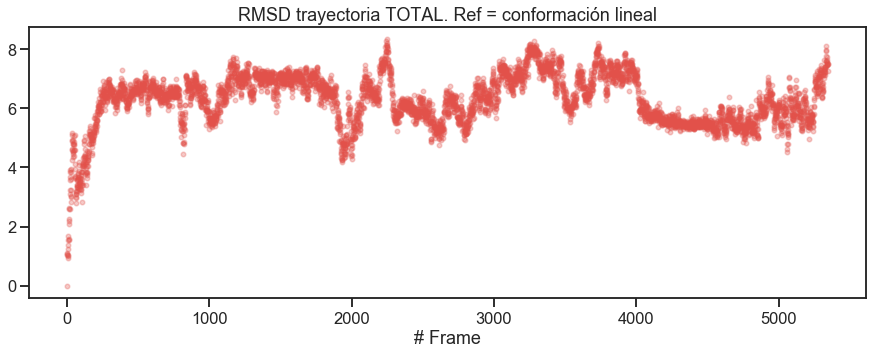

In [107]:
# Creamos la figura del RMSD de la trayectoria total
plt.scatter( x = range(full_traj.n_frames), 
             y = rmsd_full_REF_lineal, s = 20, alpha = 0.3 )
plt.title("RMSD trayectoria TOTAL. Ref = conformación lineal")
plt.xlabel("# Frame")
plt.show()

Como es de esperarse, conforme el tiempo de simulación avanza hay un aumento en el RMSD de cada frame con respecto a la  conformación inicial.  
Ahora bien, para un análisis más interesante usaremos como referencia la estructura por NMR de la proteína, con el objetivo de saber si, a lo largo de la simulación, las estructura de la proteína se aproxima a la estructura experimental.  
Para ello cargamos la estructura NMR de la proteína.

In [28]:
# Cargamos la estructura NMR
nmr_strc = pyt.load(filename = './1L2Y/5-traj_analysis/1l2y_Hs.pdb',
                  top = './1L2Y/5-traj_analysis/1l2y_Hs.psf')

Calculamos el RMSD de la trayectoria usando como referencia a nmr_strc. Seguido de ello, generamos la gráfica.

In [103]:
rmsd_full_REF_nmr = pyt.rmsd( traj = full_traj, 
                                mask = ':4-17,@CA', 
                                ref = nmr_strc)

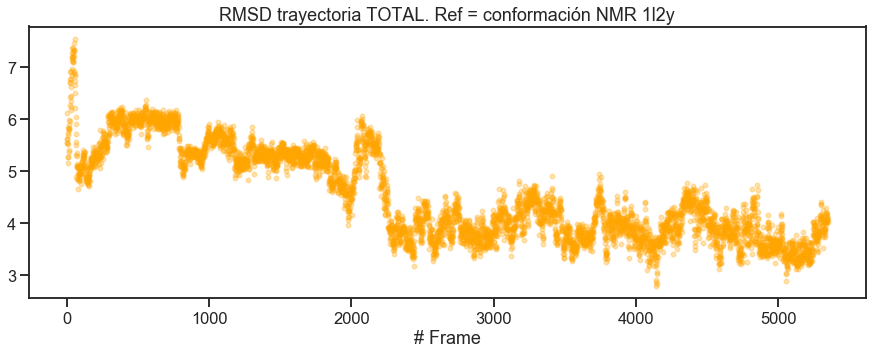

In [104]:
plt.scatter( x = range(full_traj.n_frames), y = rmsd_full_REF_nmr, 
             s = 20, alpha = 0.3, c='orange' )
plt.title("RMSD trayectoria TOTAL. Ref = conformación NMR 1l2y")
plt.xlabel("# Frame")
plt.show()

Como ves, al principio de la simulación la conformación inicial y la estructura por NMR son muy distintas (entre 6 a 8 A), sin embargo, a lo largo de la dinámica y sobre todo en la producción, la conformación de la porteína tiende a ser más parecida a la estructura NMR.

Finalmente, visualicemos únicamente la fase de producción con ambas referencias:

In [31]:
import pandas as pd

Text(0.5, 1.0, 'RMSD producción')

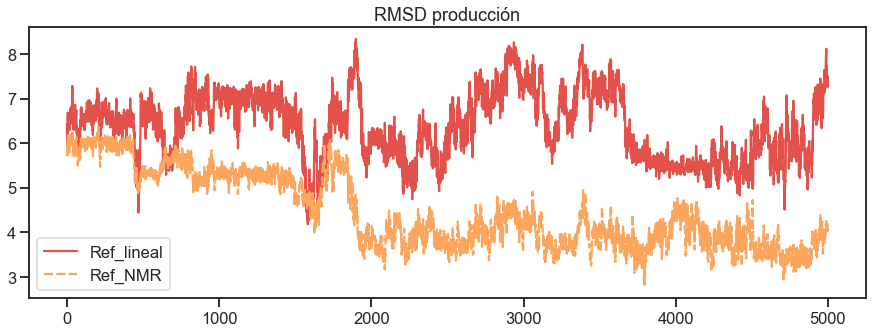

In [108]:
# Creamos una tabla con pandas
# Dado que la producción corresponde a los últimos 5000 frames,
# usamos el slicing [-5000:] para extraer esos últimos 5000 datos
rmsd_prod = pd.DataFrame({"Ref_lineal": rmsd_full_REF_lineal[-5000:], 
                          "Ref_NMR": rmsd_full_REF_nmr[-5000:]})

# Sólo por variar, vamos a usar seaborn para generar el gráfico:
ax = sns.lineplot(data = rmsd_prod)
ax.set_title("RMSD producción")

### Cálculo de RMSF
Vamos a finalizar este análisis evaluando el RMSF de la proteína a lo largo de la fase de producción. Para ello, primero vamos a superponer toda la trayectoria a un frame promedio.

#### Obtención del frame promedio

In [119]:
# Obtenemos el frame promedio
avg_prod_frame = pyt.mean_structure(traj = prod_traj)
# Y superponemos la trayectoria a dicho frame
prod_traj.superpose(ref = avg_prod_frame, mask = ':3-18@CA')

pytraj.Trajectory, 5000 frames: 
Size: 0.033975 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

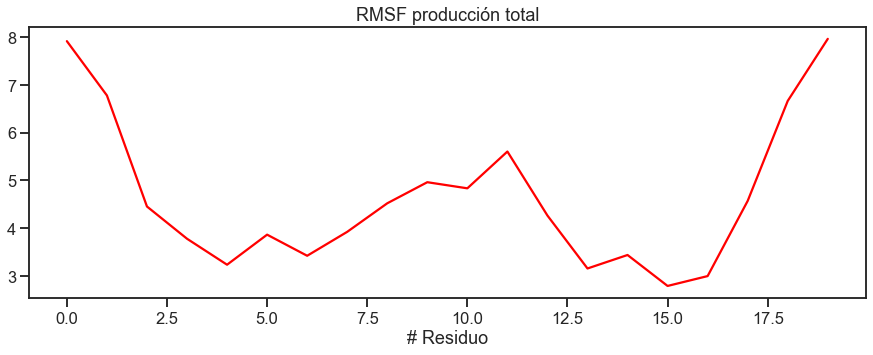

In [120]:
# Ahora calculamos el RMSF de toda la producción
rmsf_prod_traj = pyt.rmsf( prod_traj, mask = '@CA' )
# Graficamos
plt.plot( rmsf_prod_traj.T[1], c = 'red')
plt.title("RMSF producción total")
plt.xlabel("# Residuo")
plt.show()

Un análisis interesante sería ver cómo el RMSF de la proteína va cambiando tomando ciertos intervalos de la producción.

In [127]:
# Ahora calculamos el RMSF a diferentes intervalos de la producción
num_interv = 5
interv_size = int(prod_traj.n_frames / num_interv)
df_rmsf = pd.DataFrame(
        {F'Interv. {i}': pyt.rmsf( prod_traj[i*interv_size : (i+1)*interv_size],
        mask = '@CA').T[1] for i in range(num_interv)} )

Text(0.5, 1.0, 'RMSF producción')

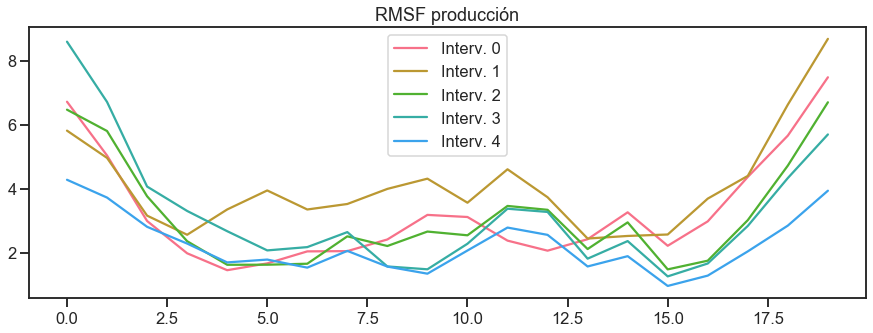

In [128]:
sns.set_palette("husl")
ax = sns.lineplot(data = df_rmsf, dashes = False)
ax.set_title("RMSF producción")

En general, podremos observar que hacia la última parte de la trayectoria, el backbone de la proteína tiende a ser más estable.

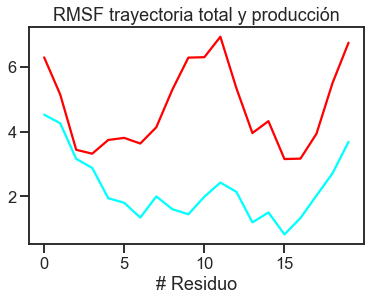

In [38]:
# Cálculo del RMSF TOTAL
full_traj.rmsfit(ref = cristal_strc)
rmsf_full_traj = pyt.rmsf(full_traj, mask = '@CA')
# Ahora comparamos con el RMSF de los últimos 1000 frames de la producción
rmsf_prod_traj = pyt.rmsf( prod_traj[-1000:], mask = '@CA' )

plt.plot( rmsf_full_traj.T[1], c = 'red')
plt.plot( rmsf_prod_traj.T[1], c = 'cyan')
#plt.plot( rmsf_prod_traj_3.T[1], c = 'blue')
plt.title("RMSF trayectoria total y producción")
plt.xlabel("# Residuo")
plt.show()

In [39]:
# Análisis de Componentes principales usando toda la trayectoria
traj_plus_cristal = full_traj.copy()
traj_plus_cristal.append_xyz(cristal_strc.xyz) 
# El último frame es la estructura del cristal
traj_plus_cristal.rmsfit( ref = cristal_strc)

pytraj.Trajectory, 5349 frames: 
Size: 0.036346 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [40]:
# Realización del PCA
pca_data = pyt.pca(traj_plus_cristal, mask=':3-18@CA', n_vecs = 5)
pca_projection = pca_data[0]

In [41]:
print('eigvenvalores de los primeros PCs', pca_data[1][0])

eigvenvalores de los primeros PCs [152.66497651  37.1090415   20.6668541   15.69702957   8.76174348]


Text(0, 0.5, 'PC2')

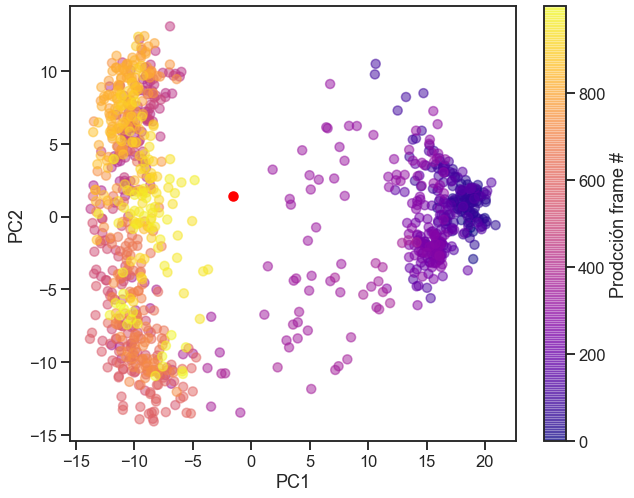

In [42]:
plt.figure(figsize= (10,8))
# Minimización, calentamiento y equilibrado
# Produccion
plt.scatter(pca_projection[0][-5000::5], pca_projection[1][-5000::5], marker='o', 
            c=range(traj_plus_cristal[-5000::5].n_frames), alpha=0.5, cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Prodcción frame #')
# Cristal
plt.scatter(pca_projection[0][-1], pca_projection[1][-1], marker='o', 
            color='red' )
plt.xlabel('PC1')
plt.ylabel('PC2')

<Universe with 304 atoms>

In [4]:
# notar que al archivo de trayectoria se 
# le ha removido el solvente para facilitar el analisis
traj = pyt.load(filename = './1L2Y/5-traj_analysis/tc5b_PROT_PROD.dcd',
                  top = './1L2Y/5-traj_analysis/1l2y_Hs.psf')
traj

pytraj.Trajectory, 5000 frames: 
Size: 0.033975 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [2]:
# Cargamos la restructura inicial
estruc_cristal = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.psf',
                             './1L2Y/5-traj_analysis/1l2y_Hs.pdb')
estruc_cristal

<Universe with 304 atoms>

In [6]:
traj = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.psf', 
                './1L2Y/5-traj_analysis/tc5b_PROT_PROD.dcd'
                  )
traj

<Universe with 304 atoms>

In [5]:
# Visualizacion de la trayectoria
nv.show_pytraj(traj)

NGLWidget(max_frame=4999)

In [7]:
nv.show_mdanalysis(traj)

/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


NGLWidget(max_frame=4999)

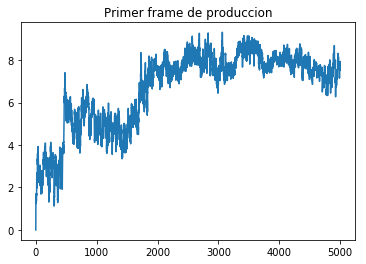

In [45]:
rmsd = pyt.rmsd(traj = traj, mask = '@CA')
plt.plot(rmsd); plt.title('Primer frame de produccion')
plt.show()

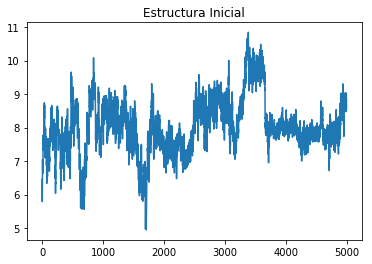

In [54]:
# RMSD comparado con la estructura inicial
rmsd = pyt.rmsd(traj = traj, mask = '@CA', ref = estruc_lineal)
plt.plot(rmsd); plt.title('Estructura Inicial')
plt.show()

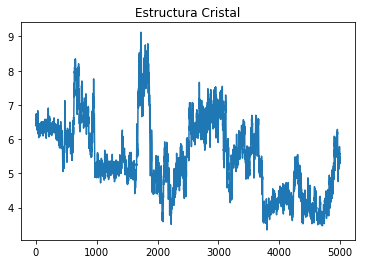

In [55]:
# RMSD comparado con la estructura inicial
rmsd = pyt.rmsd(traj = traj, mask = '@CA', ref = estruc_cristal)
plt.plot(rmsd); plt.title('Estructura Cristal')
plt.show()

In [57]:
y = nv.show_pytraj(estruc_lineal)
y

NGLWidget()

In [52]:
# Visualizacion de la esructura
w = nv.show_pytraj(estruc_cristal)
w

NGLWidget()

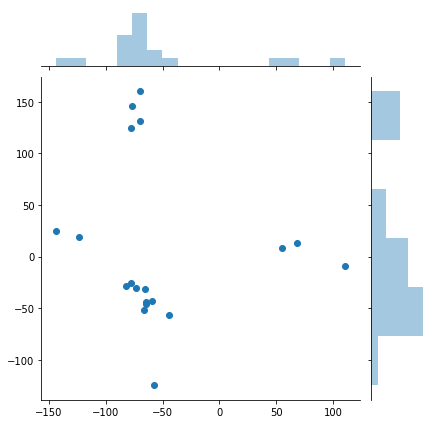

In [147]:
# Visualizacion de plots de ramachandran
# Cristal
angles = pyt.multidihedral(estruc_cristal, 'phi psi', resrange=range(20))

# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in angles if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in angles if 'psi' in d.key]).flatten()

sns.jointplot(phi, psi, kind='scatter', stat_func=None)
plt.show()

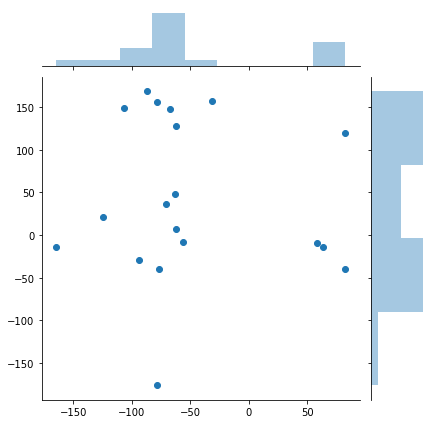

In [151]:
# Cristal
angles = pyt.multidihedral(traj[-2:-1], 'phi psi', resrange=range(20))

# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in angles if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in angles if 'psi' in d.key]).flatten()
sns.jointplot(phi, psi, kind='scatter', stat_func=None)
plt.show()

In [153]:
import MDAnalysis as mda
u = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.pdb')

# selection of atomgroups
ags = [res.phi_selection() for res in u.residues[4:9]]

from MDAnalysis.analysis.dihedrals import Dihedral
R = Dihedral(ags).run()

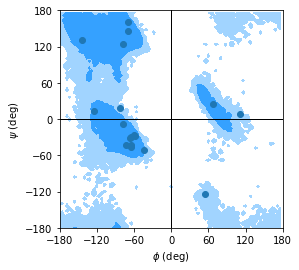

In [158]:
from MDAnalysis.analysis.dihedrals import Ramachandran

u = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.pdb')
r = u.select_atoms("resid 2-19")

R = Ramachandran(r).run()
fig, ax = plt.subplots(figsize = plt.figaspect(1))
R.plot(ref = True)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

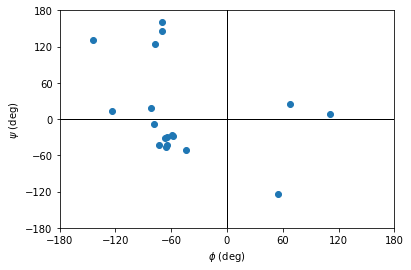

In [156]:
dir(R.plot())